# Informer Demo

## Download code and dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [2]:
import pandas as pd
df_msp = pd.read_csv("/content/drive/MyDrive/5527 project/weather_data_72658014922_2013-2020.csv", index_col=0)
df_msp

,HourlyVisibility,HourlyDryBulbTemperature,HourlyWetBulbTemperature,HourlyDewPointTemperature,HourlyRelativeHumidity,HourlyWindSpeed,HourlyWindDirection,HourlyStationPressure,HourlyAltimeterSetting
date,,,,,,,,,
2013-01-01 00:53:00,8.0,0.0,-1.0,-5.0,79.0,3.0,290.0,29.36,30.26
2013-01-01 01:53:00,8.0,-2.0,-3.0,-6.0,83.0,3.0,290.0,29.36,30.26
2013-01-01 02:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,290.0,29.36,30.26
2013-01-01 03:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,210.0,29.36,30.26
2013-01-01 04:53:00,9.0,-3.0,-4.0,-7.0,82.0,0.0,0.0,29.37,30.27
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:53:00,10.0,15.0,13.0,9.0,77.0,7.0,250.0,28.91,29.80
2019-12-31 20:53:00,10.0,14.0,13.0,9.0,80.0,7.0,230.0,28.89,29.78
2019-12-31 21:53:00,10.0,14.0,13.0,9.0,80.0,3.0,210.0,28.86,29.75


In [3]:
! ls "/content/drive/MyDrive/5527 project/nearby_to_msp_stations"

weather_data_72656204943_2013-2020.csv	weather_data_72657994963_2013-2020.csv
weather_data_72657594960_2013-2020.csv	weather_data_72658414927_2013-2020.csv
weather_data_72657794974_2013-2020.csv	weather_data_72660304974_2013-2020.csv


In [4]:
nearby = [
"weather_data_72656204943_2013-2020.csv",
"weather_data_72657994963_2013-2020.csv",
"weather_data_72657594960_2013-2020.csv",
"weather_data_72658414927_2013-2020.csv",
"weather_data_72657794974_2013-2020.csv",
"weather_data_72660304974_2013-2020.csv",
]


In [5]:
nearby_dfs = [pd.read_csv("/content/drive/MyDrive/5527 project/nearby_to_msp_stations/" + n, index_col=0) for n in nearby]

In [6]:
for i in range(len(nearby)):
  nearby_dfs[i].columns = [col + "_nearby_" + str(i) for col in nearby_dfs[i].columns]

In [7]:
for d in nearby_dfs: print(d.shape)

(168061, 9)
(78182, 9)
(76730, 9)
(74756, 9)
(105110, 9)
(177447, 9)


In [24]:
nearby_dfs2 = nearby_dfs[1:4]
len(nearby_dfs2)

3

In [26]:
in_all = set(df_msp.index)

for d in nearby_dfs2:
  in_all = in_all & set(d.index)

in_all = sorted(in_all)

len(in_all)

53961

In [27]:
df_list = [df_msp] + nearby_dfs2
df_list = [d.loc[in_all] for d in df_list]

In [28]:
concat_df = pd.concat(df_list, axis=1)
concat_df

,HourlyVisibility,HourlyDryBulbTemperature,HourlyWetBulbTemperature,HourlyDewPointTemperature,HourlyRelativeHumidity,HourlyWindSpeed,HourlyWindDirection,HourlyStationPressure,HourlyAltimeterSetting,HourlyVisibility_nearby_1,...,HourlyAltimeterSetting_nearby_2,HourlyVisibility_nearby_3,HourlyDryBulbTemperature_nearby_3,HourlyWetBulbTemperature_nearby_3,HourlyDewPointTemperature_nearby_3,HourlyRelativeHumidity_nearby_3,HourlyWindSpeed_nearby_3,HourlyWindDirection_nearby_3,HourlyStationPressure_nearby_3,HourlyAltimeterSetting_nearby_3
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:53:00,8.0,0.0,-1.0,-5.0,79.0,3.0,290.0,29.36,30.26,10.0,...,30.25,10.0,2.0,1.0,-5.0,72.0,0.0,0.0,29.51,30.28
2013-01-01 01:53:00,8.0,-2.0,-3.0,-6.0,83.0,3.0,290.0,29.36,30.26,10.0,...,30.24,10.0,1.0,0.0,-5.0,75.0,3.0,310.0,29.51,30.28
2013-01-01 02:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,290.0,29.36,30.26,10.0,...,30.26,10.0,-1.0,-2.0,-6.0,79.0,0.0,0.0,29.52,30.29
2013-01-01 03:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,210.0,29.36,30.26,10.0,...,30.25,8.0,-1.0,-2.0,-7.0,75.0,0.0,0.0,29.51,30.28
2013-01-01 04:53:00,9.0,-3.0,-4.0,-7.0,82.0,0.0,0.0,29.37,30.27,10.0,...,30.25,8.0,-2.0,-3.0,-6.0,83.0,0.0,0.0,29.52,30.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:53:00,10.0,15.0,13.0,9.0,77.0,7.0,250.0,28.91,29.80,10.0,...,29.78,10.0,15.0,13.0,9.0,77.0,5.0,260.0,29.05,29.81
2019-12-31 20:53:00,10.0,14.0,13.0,9.0,80.0,7.0,230.0,28.89,29.78,10.0,...,29.76,10.0,14.0,13.0,9.0,80.0,3.0,230.0,29.04,29.80
2019-12-31 21:53:00,10.0,14.0,13.0,9.0,80.0,3.0,210.0,28.86,29.75,9.0,...,29.73,10.0,12.0,11.0,8.0,84.0,0.0,0.0,29.01,29.77


In [4]:
df = pd.read_csv("/content/drive/MyDrive/5527 project/weather_data_msp_with_nearby_concatenated.csv")
df

,date,HourlyVisibility,HourlyDryBulbTemperature,HourlyWetBulbTemperature,HourlyDewPointTemperature,HourlyRelativeHumidity,HourlyWindSpeed,HourlyWindDirection,HourlyStationPressure,HourlyAltimeterSetting,...,HourlyAltimeterSetting_nearby_2,HourlyVisibility_nearby_3,HourlyDryBulbTemperature_nearby_3,HourlyWetBulbTemperature_nearby_3,HourlyDewPointTemperature_nearby_3,HourlyRelativeHumidity_nearby_3,HourlyWindSpeed_nearby_3,HourlyWindDirection_nearby_3,HourlyStationPressure_nearby_3,HourlyAltimeterSetting_nearby_3
0,2013-01-01 00:53:00,8.0,0.0,-1.0,-5.0,79.0,3.0,290.0,29.36,30.26,...,30.25,10.0,2.0,1.0,-5.0,72.0,0.0,0.0,29.51,30.28
1,2013-01-01 01:53:00,8.0,-2.0,-3.0,-6.0,83.0,3.0,290.0,29.36,30.26,...,30.24,10.0,1.0,0.0,-5.0,75.0,3.0,310.0,29.51,30.28
2,2013-01-01 02:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,290.0,29.36,30.26,...,30.26,10.0,-1.0,-2.0,-6.0,79.0,0.0,0.0,29.52,30.29
3,2013-01-01 03:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,210.0,29.36,30.26,...,30.25,8.0,-1.0,-2.0,-7.0,75.0,0.0,0.0,29.51,30.28
4,2013-01-01 04:53:00,9.0,-3.0,-4.0,-7.0,82.0,0.0,0.0,29.37,30.27,...,30.25,8.0,-2.0,-3.0,-6.0,83.0,0.0,0.0,29.52,30.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53956,2019-12-31 19:53:00,10.0,15.0,13.0,9.0,77.0,7.0,250.0,28.91,29.80,...,29.78,10.0,15.0,13.0,9.0,77.0,5.0,260.0,29.05,29.81
53957,2019-12-31 20:53:00,10.0,14.0,13.0,9.0,80.0,7.0,230.0,28.89,29.78,...,29.76,10.0,14.0,13.0,9.0,80.0,3.0,230.0,29.04,29.80
53958,2019-12-31 21:53:00,10.0,14.0,13.0,9.0,80.0,3.0,210.0,28.86,29.75,...,29.73,10.0,12.0,11.0,8.0,84.0,0.0,0.0,29.01,29.77
53959,2019-12-31 22:53:00,10.0,14.0,13.0,9.0,80.0,5.0,190.0,28.84,29.73,...,29.71,10.0,12.0,11.0,7.0,80.0,0.0,0.0,28.99,29.75


In [10]:
# df.iloc[:, :10].to_csv("/content/drive/MyDrive/5527 project/weather_data_msp_same_timepoints_as_concat.csv", index=False)

In [44]:
dropped_na

,date,HourlyVisibility,HourlyDryBulbTemperature,HourlyWetBulbTemperature,HourlyDewPointTemperature,HourlyRelativeHumidity,HourlyWindSpeed,HourlyWindDirection,HourlyStationPressure,HourlyAltimeterSetting,...,date_nearby_5,HourlyVisibility_nearby_5,HourlyDryBulbTemperature_nearby_5,HourlyWetBulbTemperature_nearby_5,HourlyDewPointTemperature_nearby_5,HourlyRelativeHumidity_nearby_5,HourlyWindSpeed_nearby_5,HourlyWindDirection_nearby_5,HourlyStationPressure_nearby_5,HourlyAltimeterSetting_nearby_5
0,2013-01-01 00:53:00,8.0,0.0,-1.0,-5.0,79.0,3.0,290.0,29.36,30.26,...,2013-01-01 00:12:00,10.0,2.0,1.0,-5.0,73.0,0.0,0.0,30.03,30.27
1,2013-01-01 01:53:00,8.0,-2.0,-3.0,-6.0,83.0,3.0,290.0,29.36,30.26,...,2013-01-01 00:32:00,10.0,0.0,-1.0,-6.0,75.0,0.0,0.0,30.03,30.27
2,2013-01-01 02:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,290.0,29.36,30.26,...,2013-01-01 00:52:00,10.0,0.0,-1.0,-6.0,76.0,0.0,0.0,30.03,30.27
3,2013-01-01 03:53:00,8.0,-1.0,-2.0,-6.0,79.0,3.0,210.0,29.36,30.26,...,2013-01-01 01:12:00,10.0,0.0,-1.0,-5.0,78.0,0.0,0.0,30.02,30.26
4,2013-01-01 04:53:00,9.0,-3.0,-4.0,-7.0,82.0,0.0,0.0,29.37,30.27,...,2013-01-01 01:32:00,10.0,-1.0,-2.0,-6.0,79.0,0.0,0.0,30.02,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74751,2019-11-18 06:53:00,10.0,32.0,30.0,27.0,82.0,3.0,190.0,28.90,29.79,...,2016-01-08 04:12:00,2.0,33.0,33.0,32.0,98.0,0.0,0.0,29.58,29.82
74752,2019-11-18 07:53:00,10.0,32.0,30.0,27.0,82.0,5.0,150.0,28.89,29.78,...,2016-01-08 04:32:00,2.0,33.0,33.0,32.0,98.0,0.0,0.0,29.57,29.81
74753,2019-11-18 08:53:00,8.0,32.0,30.0,28.0,85.0,8.0,140.0,28.88,29.77,...,2016-01-08 04:52:00,2.0,33.0,33.0,32.0,98.0,0.0,0.0,29.57,29.81
74754,2019-11-18 09:05:00,9.0,32.0,30.0,28.0,85.0,7.0,140.0,28.88,29.77,...,2016-01-08 05:12:00,2.5,33.0,33.0,32.0,98.0,3.0,360.0,29.56,29.80


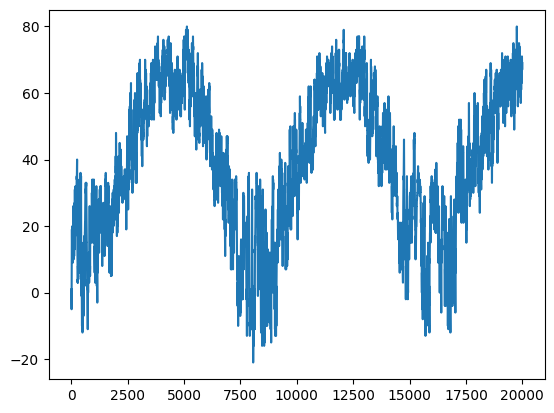

In [11]:
import matplotlib.pyplot as plt

plt.plot(df["HourlyWetBulbTemperature_nearby_3"][:20000])

In [12]:
df.isna().sum().sum()

0

In [13]:

# !git clone https://github.com/zhouhaoyi/Informer2020.git
# !git clone https://github.com/zhouhaoyi/ETDataset.git
! git clone https://github.com/dtrifunac/Informer-Weather-Forcasting.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 576 (delta 199), reused 188 (delta 188), pack-reused 354
Receiving objects: 100% (576/576), 6.48 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (336/336), done.
drive  Informer2020  sample_data


In [14]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']
sys.path.append('drive/MyDrive/')

In [15]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [16]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [17]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data write 'custom' when we have our own data
# args.root_path = '/content/drive/MyDrive/CS 5527/' # root path of data file
args.root_path = '/content/drive/MyDrive/5527 project/' # root path of data file
args.data_path = 'weather_data_msp_with_nearby_concatenated.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'HourlyWetBulbTemperature' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 336 # input sequence length of Informer encoder
args.label_len = 168 # start token length of Informer decoder
args.pred_len = 168 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 36 # encoder input size
args.dec_in = 36 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h'

args.batch_size = 32
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [18]:
! nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-55a0f7c9-489b-d7b9-2877-953ad288ba30)


In [19]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]
args.use_gpu

True

In [20]:
# Set augments by using data name
# data_parser = {
#     'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
#     'ETTh2':{'data':'ETTh2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
#     'ETTm1':{'data':'ETTm1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
#     'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
# }
# if args.data in data_parser.keys():
#     data_info = data_parser[args.data]
#     args.data_path = data_info['data']
#     args.target = data_info['T']
#     args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [21]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [22]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': '/content/drive/MyDrive/5527 project/', 'data_path': 'weather_data_msp_with_nearby_concatenated.csv', 'features': 'MS', 'target': 'HourlyWetBulbTemperature', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 336, 'label_len': 168, 'pred_len': 168, 'enc_in': 36, 'dec_in': 36, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3', 'detail_freq': 'h'}


In [23]:
for a in args:
  print(a, args[a])

model informer
data custom
root_path /content/drive/MyDrive/5527 project/
data_path weather_data_msp_with_nearby_concatenated.csv
features MS
target HourlyWetBulbTemperature
freq h
checkpoints ./informer_checkpoints
seq_len 336
label_len 168
pred_len 168
enc_in 36
dec_in 36
c_out 1
factor 5
d_model 512
n_heads 8
e_layers 2
d_layers 1
d_ff 2048
dropout 0.05
attn prob
embed timeF
activation gelu
distil True
output_attention False
mix True
padding 0
batch_size 32
learning_rate 0.0001
loss mse
lradj type1
use_amp False
num_workers 0
itr 1
train_epochs 6
patience 3
des exp
use_gpu True
gpu 0
use_multi_gpu False
devices 0,1,2,3
detail_freq h


In [24]:
Exp = Exp_Informer

In [25]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features,
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)

    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)

    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl336_ll168_pl168_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 37269
val 5230
test 10625
	iters: 100, epoch: 1 | loss: 0.1922189
	speed: 0.1224s/iter; left time: 843.0295s
	iters: 200, epoch: 1 | loss: 0.1763504
	speed: 0.0865s/iter; left time: 586.9559s
	iters: 300, epoch: 1 | loss: 0.2216130
	speed: 0.0859s/iter; left time: 573.9401s
	iters: 400, epoch: 1 | loss: 0.1564945
	speed: 0.0870s/iter; left time: 572.9223s
	iters: 500, epoch: 1 | loss: 0.1139165
	speed: 0.0865s/iter; left time: 561.1820s
	iters: 600, epoch: 1 | loss: 0.1311327
	speed: 0.0861s/iter; left time: 550.0505s
	iters: 700, epoch: 1 | loss: 0.1064715
	speed: 0.0860s/iter; left time: 540.7345s
	iters: 800, epoch: 1 | loss: 0.1248411
	speed: 0.0873s/iter; left time: 540.0081s
	iters: 900, epoch: 1 | loss: 0.0792590
	speed: 0.0867s/iter; left time: 527.6373s
	iters: 1000, epoch: 1 | loss: 0.1019095
	speed: 0.0

In [26]:
! cp -r /content/informer_checkpoints/informer_custom_ftMS_sl336_ll168_pl168_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0 "/content/drive/MyDrive/5527 project/msp_results/nearby_concat"

In [27]:
! cp -r /content/results "/content/drive/MyDrive/5527 project/msp_results/nearby_concat"

## Prediction

In [23]:
# import os

# set saved model path
# setting = 'informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
# path

'./informer_checkpoints/informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0/checkpoint.pth'

In [61]:
# If you already have a trained model, you can set the arguments and model path, then initialize a Experiment and use it to predict
# Prediction is a sequence which is adjacent to the last date of the data, and does not exist in the data
# If you want to get more information about prediction, you can refer to code `exp/exp_informer.py function predict()` and `data/data_loader.py class Dataset_Pred`

exp = Exp(args)

exp.predict(setting, True)

Use GPU: cuda:0
pred 1


In [25]:
# the prediction will be saved in ./results/{setting}/real_prediction.npy
import numpy as np

prediction = np.load('./results/'+setting+'/pred.npy')

prediction.shape

(19904, 24, 1)

### More details about Prediction - prediction function

In [26]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')

    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()

    preds = []

    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)

        pred = outputs.detach().cpu().numpy()#.squeeze()

        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])

    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    np.save(folder_path+'real_prediction.npy', preds)

    return preds


In [27]:
# you can also use this prediction function to get result
prediction = predict(exp, setting, True)

pred 1


In [29]:
prediction.shape

(1, 24, 1)

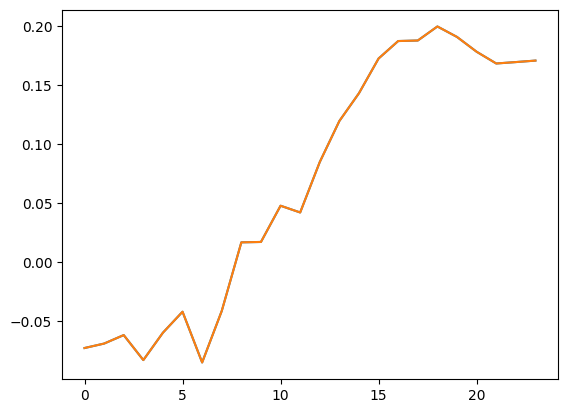

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.plot(real[0,:,-1])
plt.show()

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).

In [30]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [31]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [32]:
len(data_set), len(data_loader)

(1, 1)

## Visualization

In [28]:
import numpy as np
# When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((10624, 168, 1), (10624, 168, 1))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

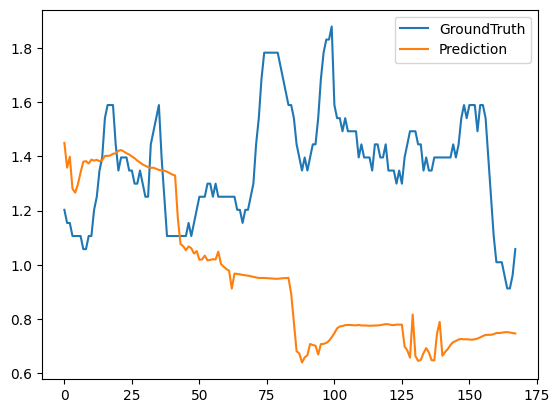

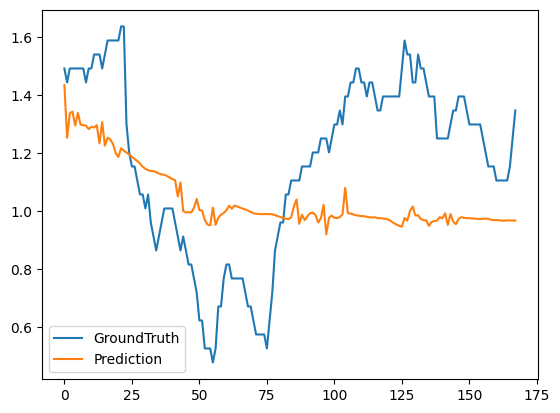

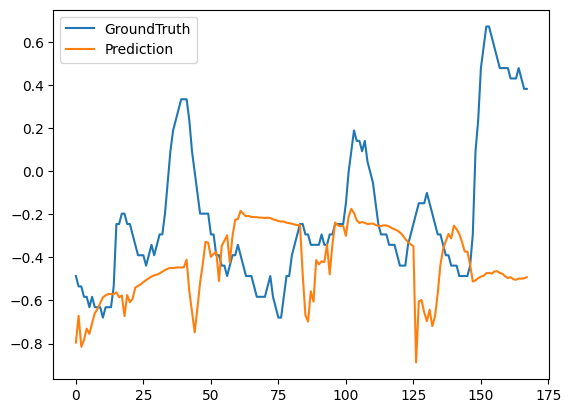

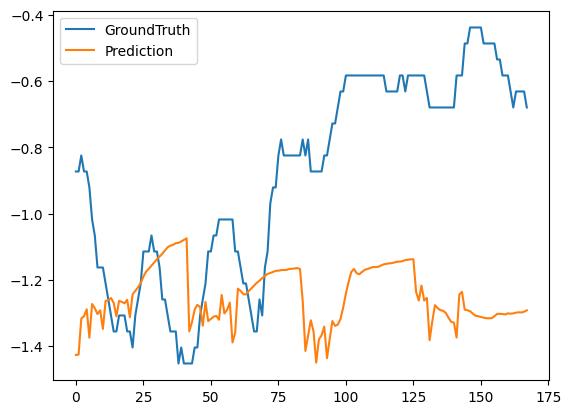

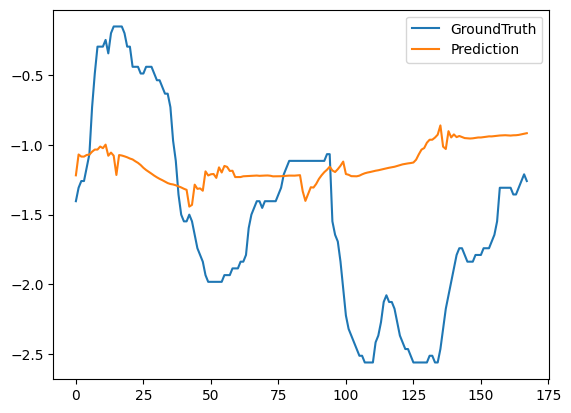

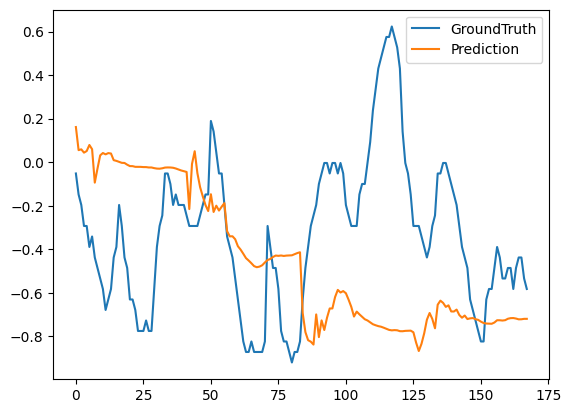

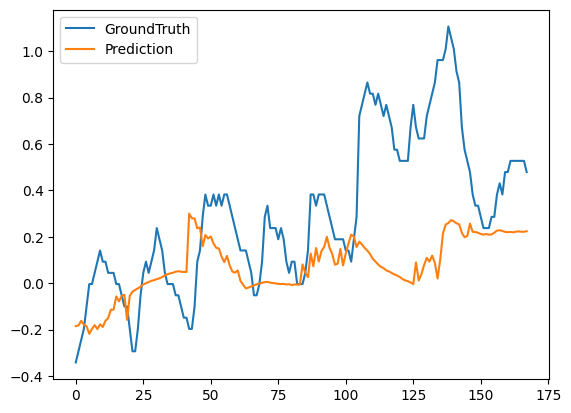

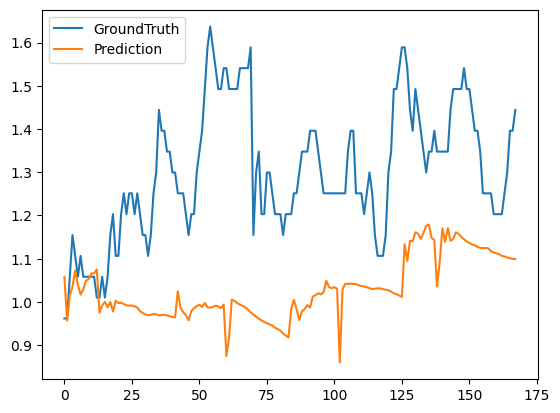

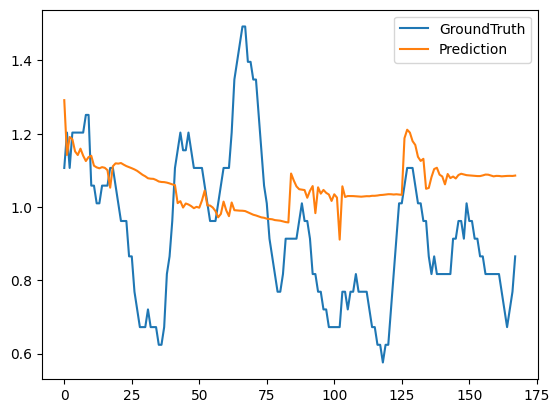

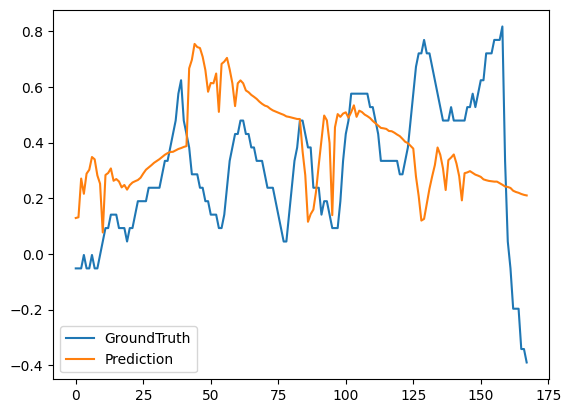

In [30]:
# draw OT prediction
frame = 1

for example in range(0, 10000, 1000):
  plt.figure()
  plt.plot(trues[example: example + frame,:,-1].flatten(), label='GroundTruth')
  plt.plot(preds[example:example + frame,:,-1].flatten(), label='Prediction')
  plt.legend()
  plt.show()

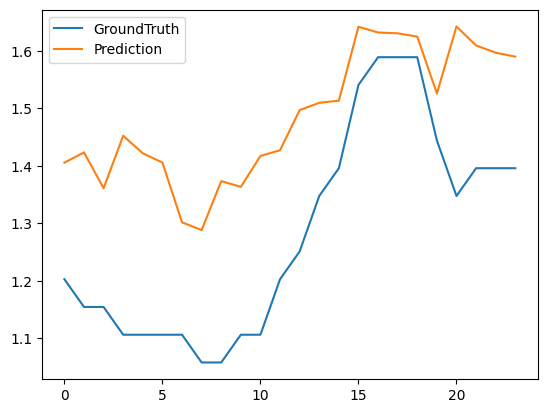

In [67]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

In [ ]:
from data.data_loader import Dataset_ETT_hour
from torch.utils.data import DataLoader

Data = Dataset_ETT_hour
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
import os

args.output_attention = True

exp = Exp(args)

model = exp.model

setting = 'informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [ ]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.float().to(exp.device)
    batch_y = batch_y.float()

    batch_x_mark = batch_x_mark.float().to(exp.device)
    batch_y_mark = batch_y_mark.float().to(exp.device)

    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).float()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).float().to(exp.device)

    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

In [ ]:
attn[0].shape, attn[1].shape #, attn[2].shape

(torch.Size([1, 8, 96, 96]), torch.Size([1, 8, 48, 48]))

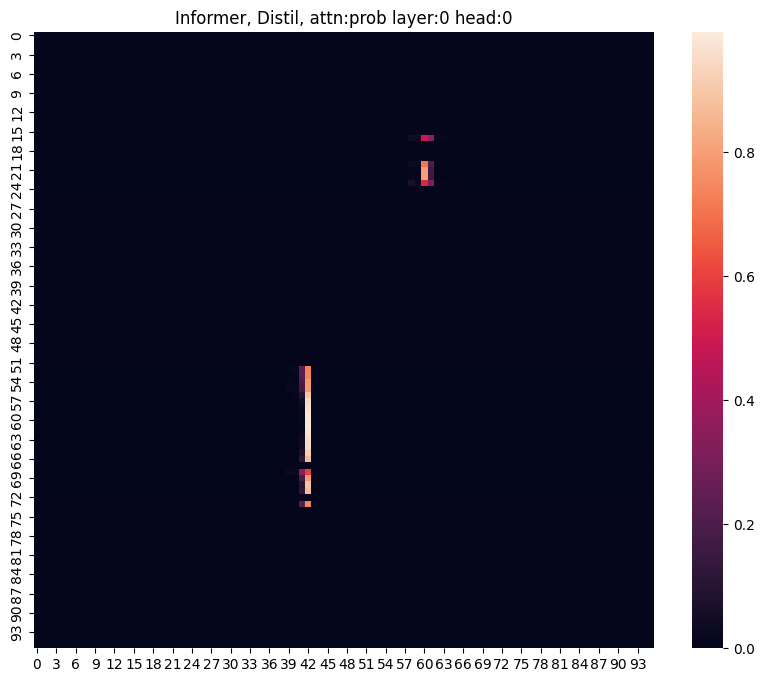

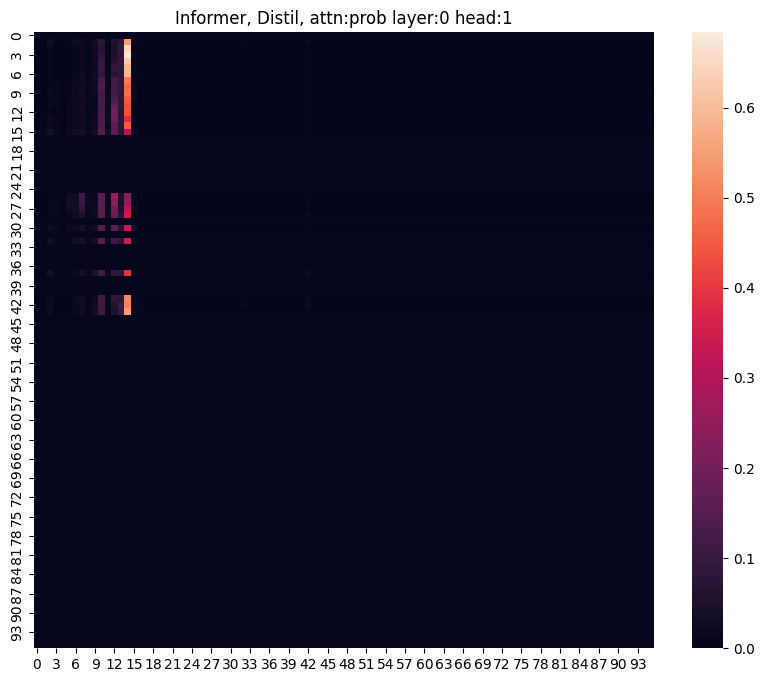

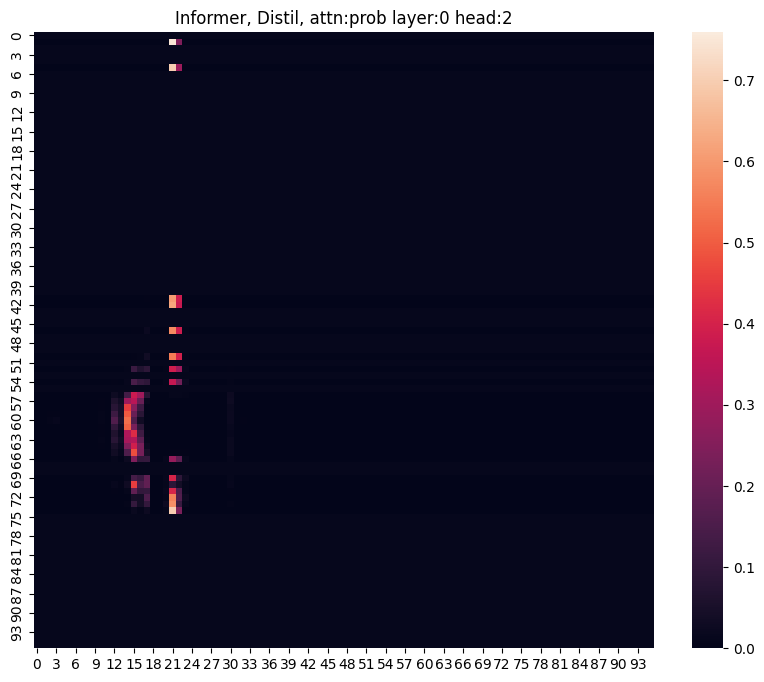

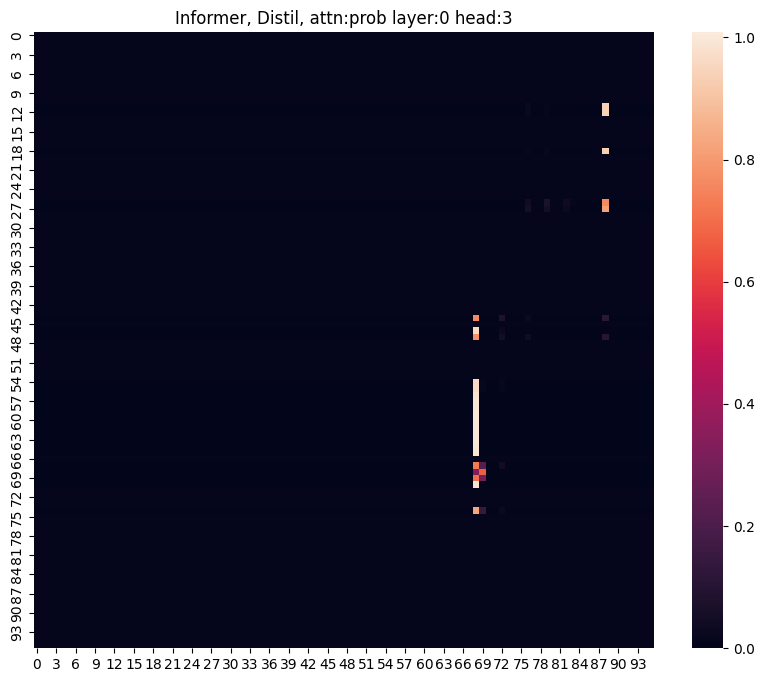

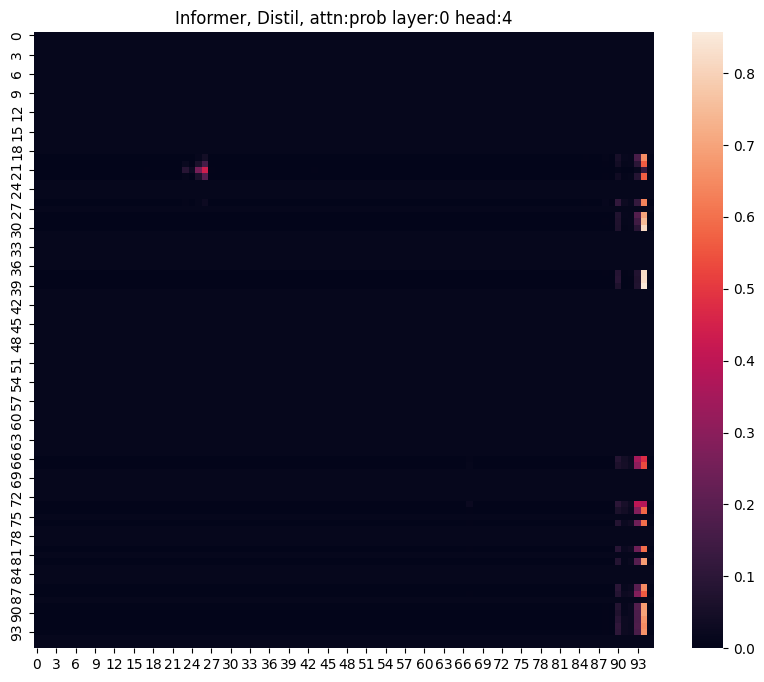

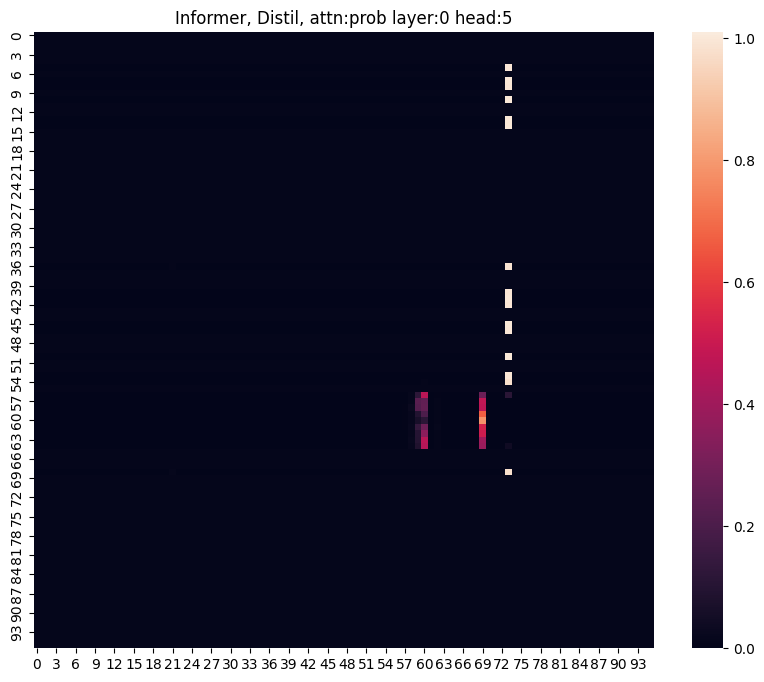

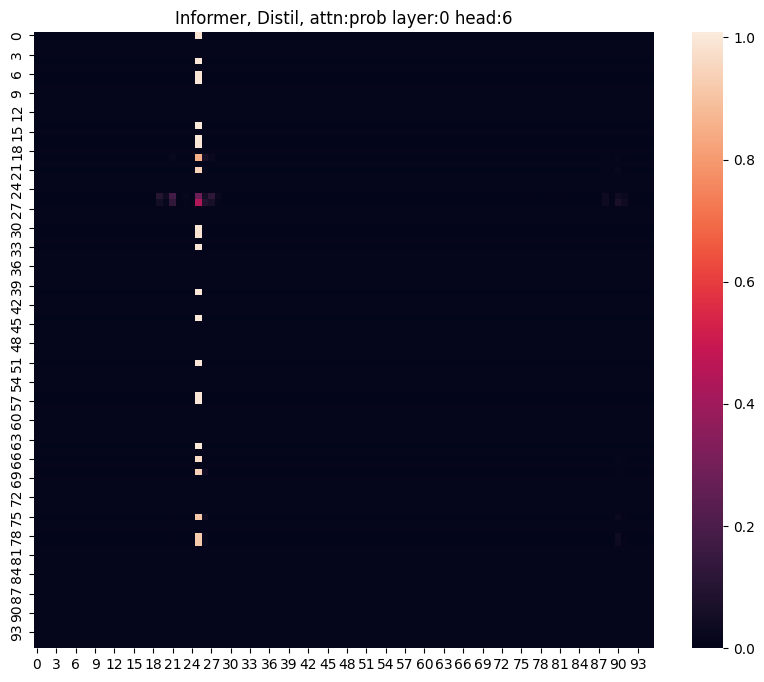

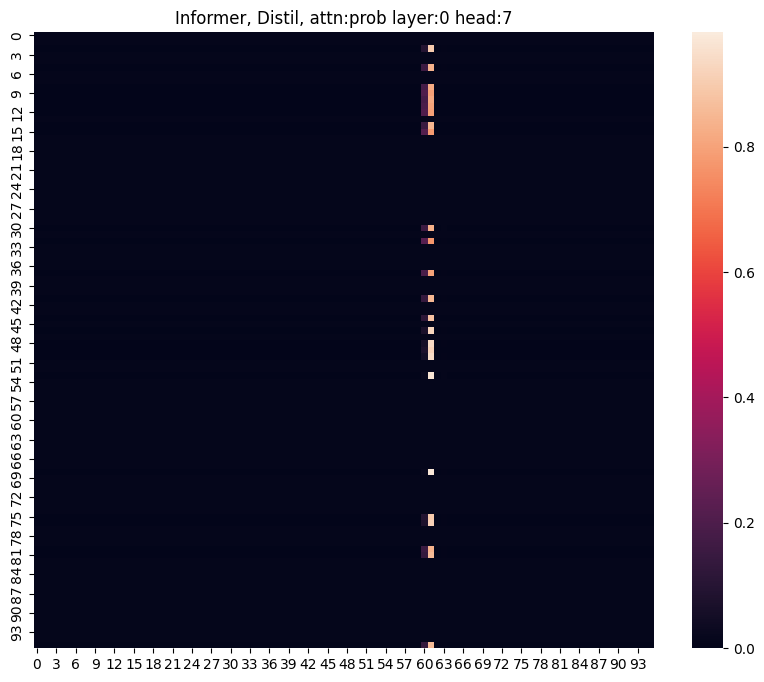

In [ ]:
layer = 0
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

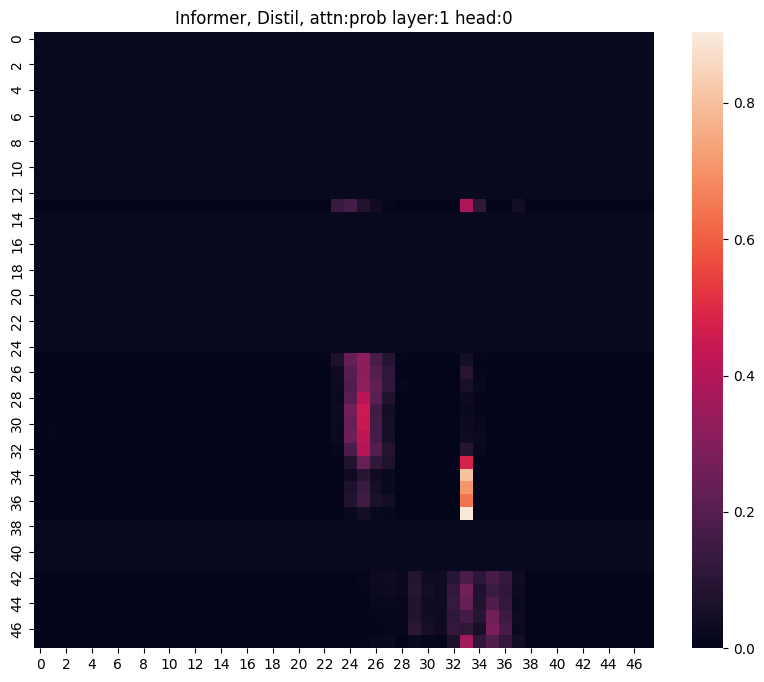

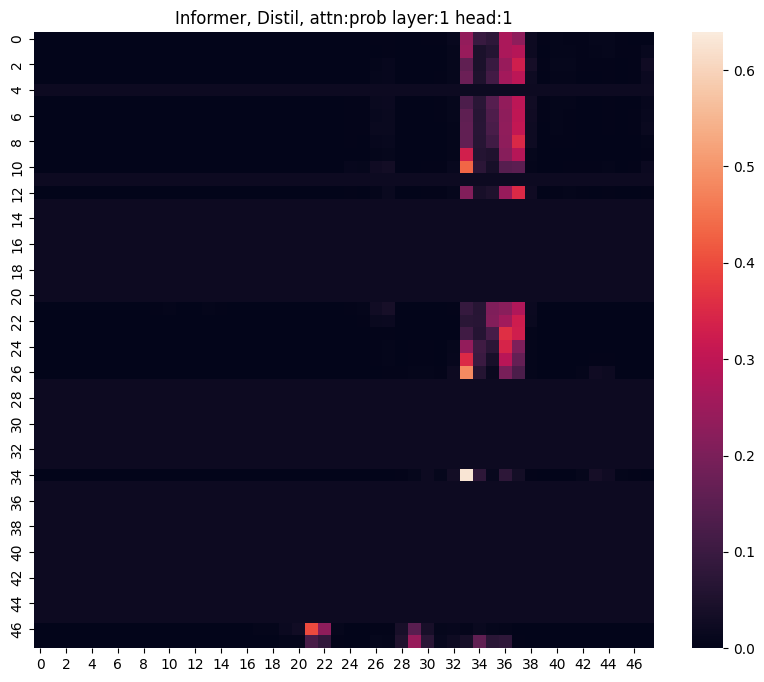

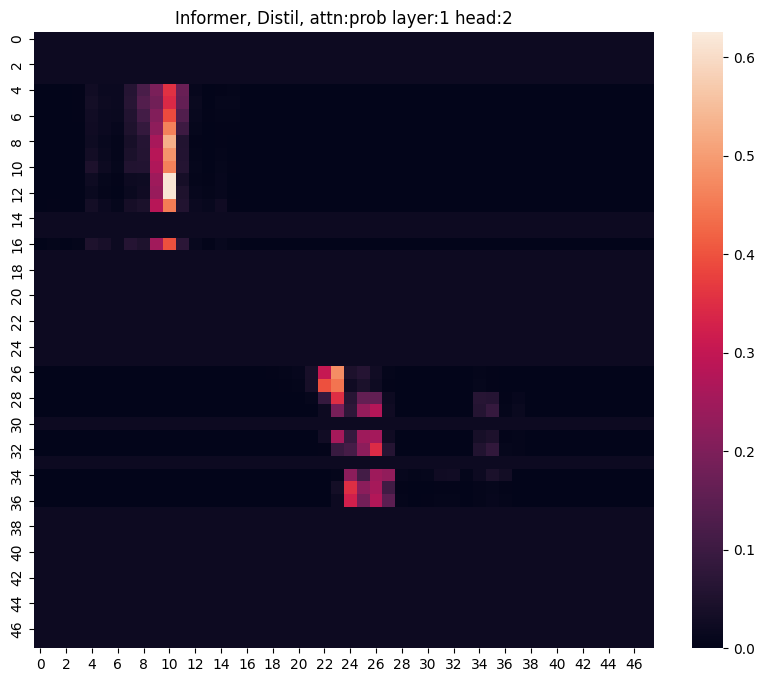

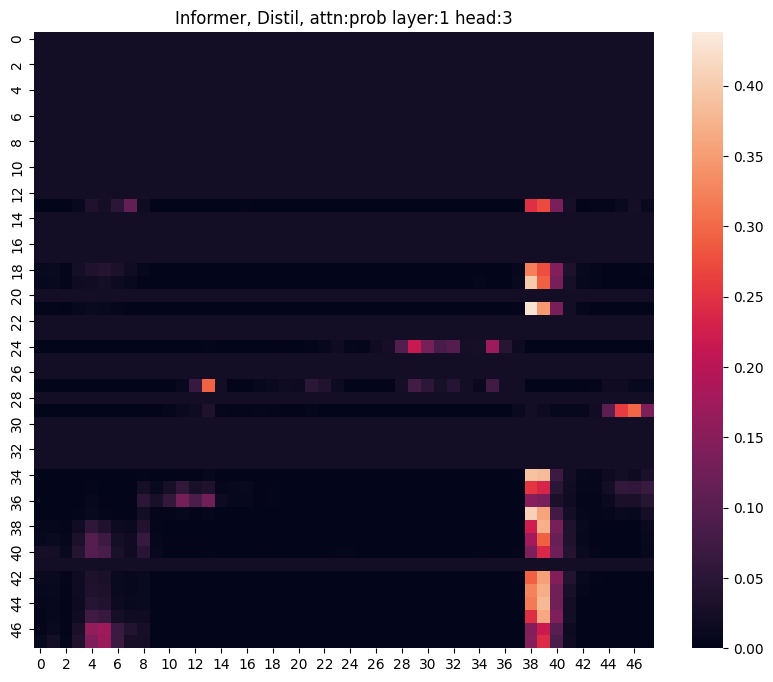

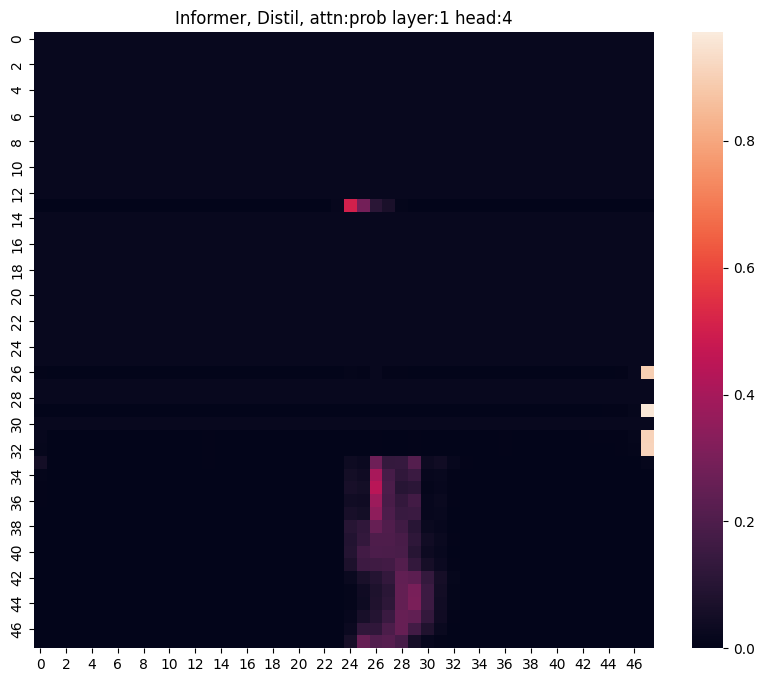

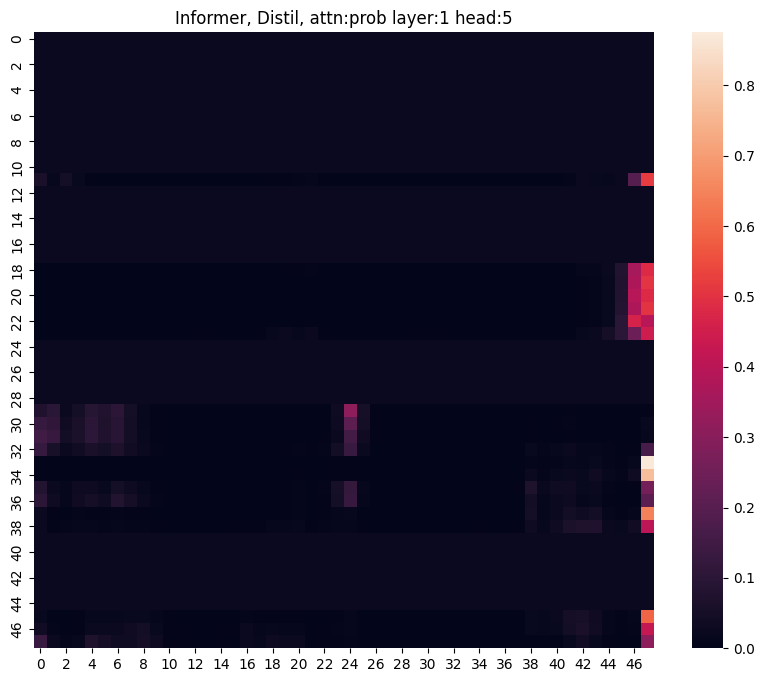

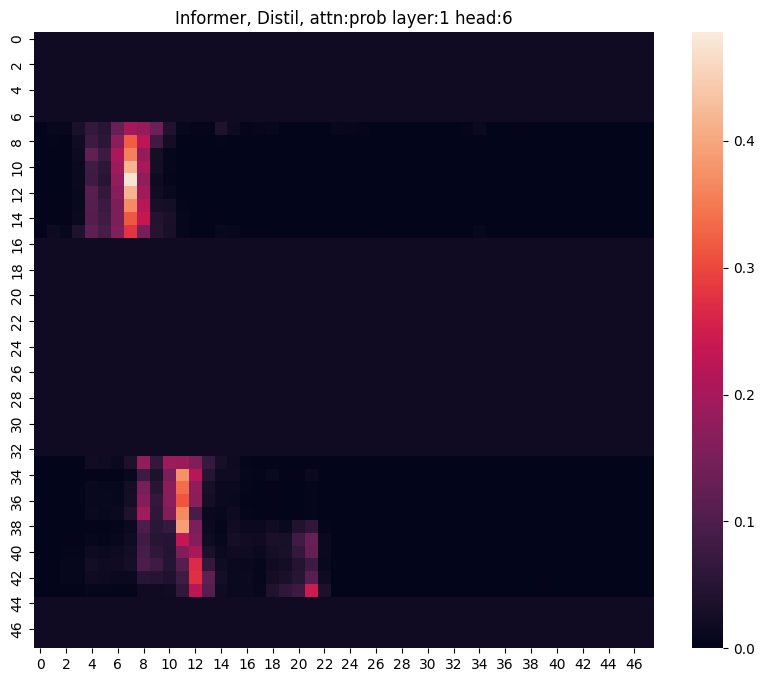

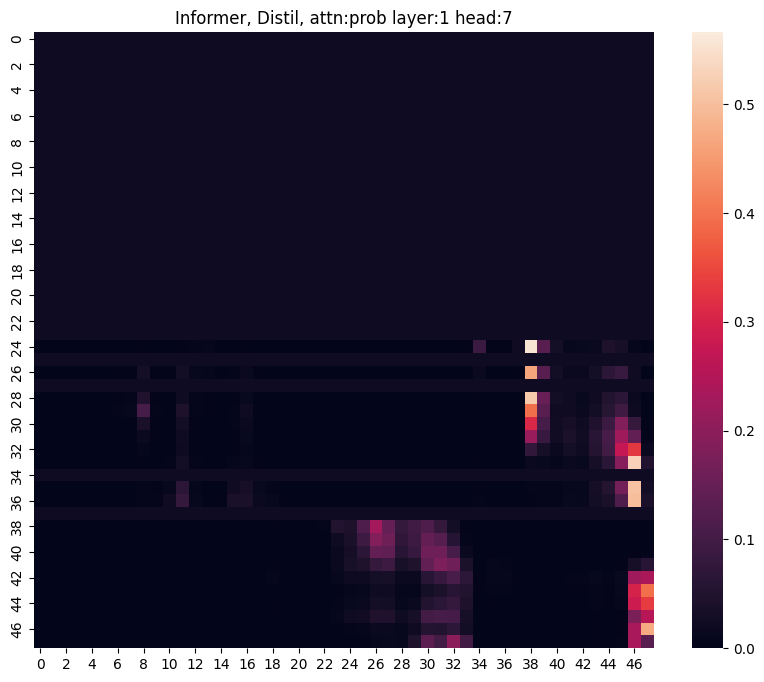

In [ ]:
layer = 1
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

## Custom Data

Custom data (xxx.csv) has to include at least 2 features: `date`(format: `YYYY-MM-DD hh:mm:ss`) and `target feature`.


In [ ]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [ ]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'ETTh2.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [ ]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [ ]:
'''
We set 'HULL' as target instead of 'OT'

The following frequencies are supported:
        Y   - yearly
            alias: A
        M   - monthly
        W   - weekly
        D   - daily
        B   - business days
        H   - hourly
        T   - minutely
            alias: min
        S   - secondly
'''

args.target = 'HULL'
args.freq = 'h'

Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
batch_x,batch_y,batch_x_mark,batch_y_mark = data_set[0]